**TP Content:**

1.   Preprocessing
2.   DecisionTree



In [2]:
import numpy as np
np.random.seed(1)
random_state=1

In [14]:
import pandas as pd
import urllib.request
import os

data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/zakariae20/datasets/main/"
os.makedirs(data_path, exist_ok=True)
url = download_path + 'datafootball.csv'
urllib.request.urlretrieve(url, data_path + "datafootball.csv")
data = pd.read_csv(data_path + "datafootball.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "datafootball.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

data.head()

,Weather,Day_of_the_Week,Time_of_Day,Mood,Physical_Fitness,Commitments,Friends_Availability,Injury_Health,Game_Importance,Field_Accessibility,Play_Football?
0,Sunny,Weekend,Afternoon,Happy,High,NaN,Available,No,Casual,Nearby,1
1,Rainy,Weekday,Evening,Tired,Medium,Work,Not available,No,Competitive,Far,0
2,Cloudy,Weekend,Morning,Energetic,High,NaN,Available,Yes,Casual,Nearby,1
3,Sunny,Weekend,Afternoon,Content,High,NaN,Available,No,Casual,Nearby,0
4,Rainy,Weekday,Evening,Happy,Low,Meeting,Not available,Yes,Competitive,Far,0


In [15]:
MIT = data.drop('Play_Football?', axis='columns')
target = data['Play_Football?']

In [ ]:
target

0     1
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    1
12    1
13    0
14    1
15    0
16    0
17    1
18    1
19    0
20    1
21    0
22    0
23    1
24    1
25    0
26    1
27    0
28    0
29    1
30    1
31    0
32    1
33    0
34    0
35    1
36    1
37    0
38    1
39    0
40    0
Name: Play_Football?, dtype: int64

In [ ]:
MIT

,Weather,Day_of_the_Week,Time_of_Day,Mood,Physical_Fitness,Commitments,Friends_Availability,Injury_Health,Game_Importance,Field_Accessibility
0,Sunny,Weekend,Afternoon,Happy,High,None,Available,No,Casual,Nearby
1,Rainy,Weekday,Evening,Tired,Medium,Work,Not available,No,Competitive,Far
2,Cloudy,Weekend,Morning,Energetic,High,None,Available,Yes,Casual,Nearby
3,Sunny,Weekend,Afternoon,Content,High,None,Available,No,Casual,Nearby
4,Rainy,Weekday,Evening,Happy,Low,Meeting,Not available,Yes,Competitive,Far
5,Cloudy,Weekday,Morning,Content,Medium,Work,Available,No,Casual,Nearby
6,Sunny,Weekend,Evening,Happy,High,None,Available,No,Competitive,Far
7,Rainy,Weekday,Afternoon,Tired,Medium,Meeting,Not available,Yes,Casual,Nearby
8,Cloudy,Weekend,Morning,Content,High,None,Available,No,Competitive,Far
9,Sunny,Weekday,Afternoon,Happy,High,Work,Not available,Yes,Casual,Nearby


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
feature_names = MIT.columns
feature_names

Index(['Weather', 'Day_of_the_Week', 'Time_of_Day', 'Mood', 'Physical_Fitness',
       'Commitments', 'Friends_Availability', 'Injury_Health',
       'Game_Importance', 'Field_Accessibility'],
      dtype='object')

In [ ]:
le_Weather = LabelEncoder()
le_Day_of_the_Week = LabelEncoder()
le_Time_of_Day = LabelEncoder()
le_Mood = LabelEncoder()
le_Physical_Fitness = LabelEncoder()
le_Commitments = LabelEncoder()
le_Friends_Availability = LabelEncoder()
le_Injury_Health = LabelEncoder()
le_Game_Importance = LabelEncoder()
le_Field_Accessibility = LabelEncoder()

In [ ]:
MIT['Weather_n'] = le_Weather.fit_transform(MIT['Weather'])
MIT['Day_of_the_Week_n'] = le_Day_of_the_Week.fit_transform(MIT['Day_of_the_Week'])
MIT['Time_of_Day_n'] = le_Time_of_Day.fit_transform(MIT['Time_of_Day'])
MIT['Mood_n'] = le_Mood.fit_transform(MIT['Mood'])
MIT['Physical_Fitness_n'] = le_Physical_Fitness.fit_transform(MIT['Physical_Fitness'])
MIT['Commitments_n'] = le_Commitments.fit_transform(MIT['Commitments'])
MIT['Friends_Availability_n'] = le_Friends_Availability.fit_transform(MIT['Friends_Availability'])
MIT['Injury_Health_n'] = le_Injury_Health.fit_transform(MIT['Injury_Health'])
MIT['Game_Importance_n'] = le_Game_Importance.fit_transform(MIT['Game_Importance'])
MIT['Field_Accessibility_n'] = le_Field_Accessibility.fit_transform(MIT['Field_Accessibility'])
MIT.head()

,Weather,Day_of_the_Week,Time_of_Day,Mood,Physical_Fitness,Commitments,Friends_Availability,Injury_Health,Game_Importance,Field_Accessibility,Weather_n,Day_of_the_Week_n,Time_of_Day_n,Mood_n,Physical_Fitness_n,Commitments_n,Friends_Availability_n,Injury_Health_n,Game_Importance_n,Field_Accessibility_n
0,Sunny,Weekend,Afternoon,Happy,High,None,Available,No,Casual,Nearby,2,1,0,2,0,1,0,0,0,1
1,Rainy,Weekday,Evening,Tired,Medium,Work,Not available,No,Competitive,Far,1,0,1,3,2,2,1,0,1,0
2,Cloudy,Weekend,Morning,Energetic,High,None,Available,Yes,Casual,Nearby,0,1,2,1,0,1,0,1,0,1
3,Sunny,Weekend,Afternoon,Content,High,None,Available,No,Casual,Nearby,2,1,0,0,0,1,0,0,0,1
4,Rainy,Weekday,Evening,Happy,Low,Meeting,Not available,Yes,Competitive,Far,1,0,1,2,1,0,1,1,1,0


In [ ]:
MIT_n = MIT.drop(['Weather','Day_of_the_Week','Time_of_Day', 'Mood', 'Physical_Fitness', 'Commitments', 'Friends_Availability', 'Injury_Health', 'Game_Importance', 'Field_Accessibility'], axis='columns')
MIT_n

,Weather_n,Day_of_the_Week_n,Time_of_Day_n,Mood_n,Physical_Fitness_n,Commitments_n,Friends_Availability_n,Injury_Health_n,Game_Importance_n,Field_Accessibility_n
0,2,1,0,2,0,1,0,0,0,1
1,1,0,1,3,2,2,1,0,1,0
2,0,1,2,1,0,1,0,1,0,1
3,2,1,0,0,0,1,0,0,0,1
4,1,0,1,2,1,0,1,1,1,0
5,0,0,2,0,2,2,0,0,0,1
6,2,1,1,2,0,1,0,0,1,0
7,1,0,0,3,2,0,1,1,0,1
8,0,1,2,0,0,1,0,0,1,0
9,2,0,0,2,0,2,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = MIT_n
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
foot_clf = DecisionTreeClassifier(random_state=random_state)
foot_clf = foot_clf.fit(X_train, y_train)

In [ ]:
foot_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
X_test

,Weather_n,Day_of_the_Week_n,Time_of_Day_n,Mood_n,Physical_Fitness_n,Commitments_n,Friends_Availability_n,Injury_Health_n,Game_Importance_n,Field_Accessibility_n
3,2,1,0,0,0,1,0,0,0,1
2,0,1,2,1,0,1,0,1,0,1
23,0,0,2,0,0,0,1,1,0,1
38,0,1,2,1,0,1,0,0,1,0
17,0,0,2,2,0,2,1,1,0,1
28,1,1,1,2,1,1,0,1,1,0
19,1,0,1,3,1,0,1,0,0,1
34,1,1,1,3,1,1,0,0,1,0
30,2,1,0,0,0,1,0,0,1,0
22,1,1,1,2,2,1,0,0,1,0


In [ ]:
predictions = foot_clf.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

3     0
2     1
23    1
38    1
17    1
28    0
19    0
34    0
30    1
22    0
21    0
32    1
27    0
33    0
Name: Play_Football?, dtype: int64

In [ ]:
foot_clf.score(X_test,y_test)

0.9285714285714286

In [ ]:
foot_clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.86      1.00      0.92         6

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



In [ ]:
foot_clf.predict([[2,1,0,2,0,1,0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
feature_importance = pd.DataFrame(foot_clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Physical_Fitness,0.503528
Weather,0.222527
Friends_Availability,0.139080
Mood,0.134865
Day_of_the_Week,0.000000
Time_of_Day,0.000000
Commitments,0.000000
Injury_Health,0.000000
Game_Importance,0.000000
Field_Accessibility,0.000000


<Axes: >

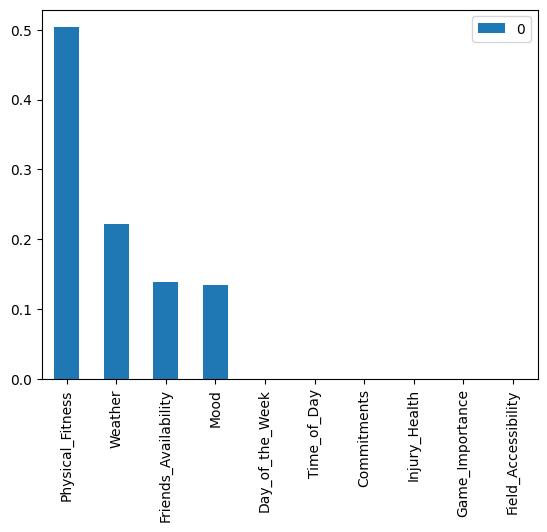

In [ ]:
feature_importance.head(10).plot(kind='bar')

[Text(0.5, 0.875, 'Physical_Fitness <= 0.5\ngini = 0.499\nsamples = 27\nvalue = [13, 14]'),
 Text(0.25, 0.625, 'Friends_Availability <= 0.5\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.375, 'Weather <= 1.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.625, 'Mood <= 1.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

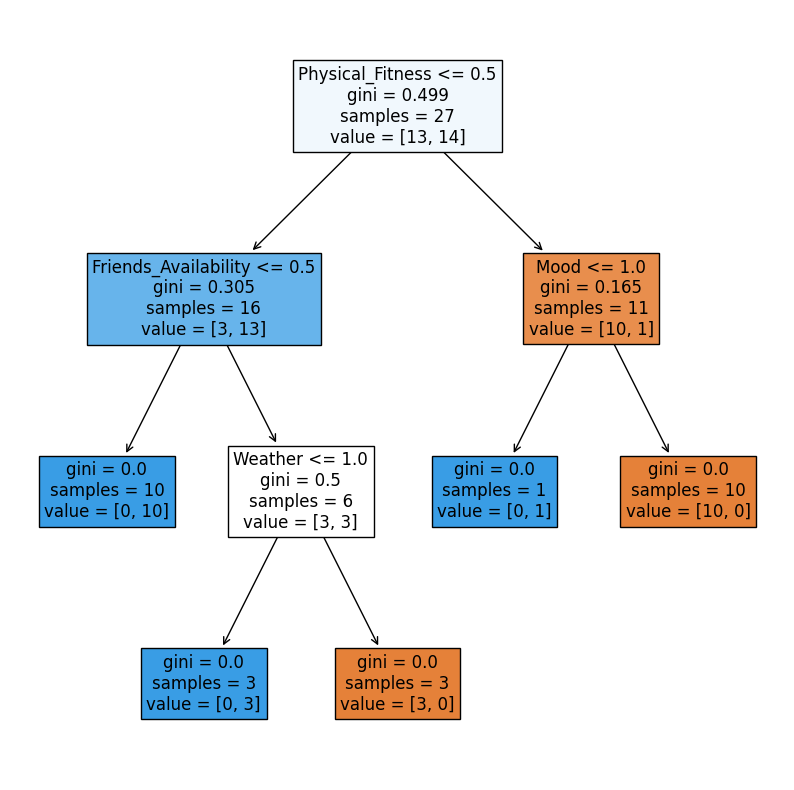

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(foot_clf, feature_names=feature_names, filled=True, fontsize=12)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
foot_clf = DecisionTreeClassifier(criterion='entropy')
foot_clf = foot_clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'Physical_Fitness <= 0.5\nentropy = 0.999\nsamples = 27\nvalue = [13, 14]'),
 Text(0.25, 0.625, 'Friends_Availability <= 0.5\nentropy = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.375, 'Weather <= 1.0\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.625, 'Time_of_Day <= 1.5\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.625, 0.375, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

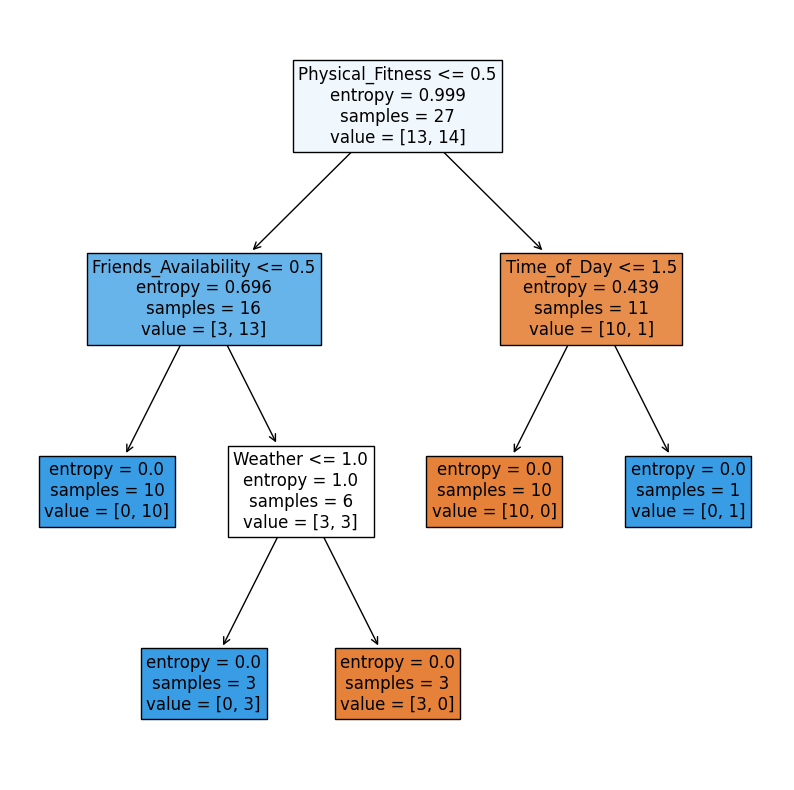

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(foot_clf, feature_names=feature_names, filled=True, fontsize=12)